<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_09/Lecture_01/PostClass-01_24_Mall_Customer_Analysis_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dataset: 

This dataset is about customers and spending habits.  The problem we are solving is how to group similar customers together and understand the different groups.  This is a common clustering problem called Customer Segmentation.

Link to Dataset:

https://docs.google.com/spreadsheets/d/e/2PACX-1vQGG95zRf7Hmos7Gx7VqpJmksOos3bgxr73KYfmc8soEnvk_L4rVcNPcUHDpmNMDnRyof6UPlm-DTEp/pub?gid=1011669702&single=true&output=csv

In [ ]:
#Load in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQGG95zRf7Hmos7Gx7VqpJmksOos3bgxr73KYfmc8soEnvk_L4rVcNPcUHDpmNMDnRyof6UPlm-DTEp/pub?gid=1011669702&single=true&output=csv')

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# The Project:

This is a the .head() from a dataset for mall customers and this is the [original source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

Our challenge is to provide a meaningful analysis of customer groups based on the data.

This is a business analyst task that can be improved with unsupervised learning.  

# Planning the Exploration


1. Use  Kmeans to establish clusters based on just the income and the spending score.  
* How many clusters seems optimal?
* Make a scatterplot with these features and color code it based on the cluster.

2. Perform a similar investigation based the age and the spending score.
* How many clusters seems optimal?
* Make a scatterplot with these features and color code it based on cluster

3. What happens when you combine all three features? (age, income, and spending?)
	As a challenge make a 3D scatterplot!  See [link here](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) for info on 3D scatterplot


Task 1 Use  Kmeans to establish clusters based on just the income and the spending score.  Remember that you must use scaled data for Kmeans.
How many clusters seems optimal?



In [ ]:
# define the columns you want to use (X is fine, but remember there isn't an X and y)

x=df[['Annual Income (k$)','Spending Score (1-100)']]


# Remember:
Do NOT train/test split

In [ ]:
# check head of new data
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Why do we scale data**
- every feature has 2 attributes, unit and magnitude. Suppose in 2D plane you are finding distance between two data points using [Eculidean Distance](https://colab.research.google.com/drive/1AoT0C6sDSvIz-6wAwdPUgzwnjiIe5YvJ?usp=sharing). If you have different units and high difference in magnitude of the feature, coefficients could not be reliably compared.

In [ ]:
# scale the data
scaler =StandardScaler()
scaled_x = scaler.fit_transform(x)

# Choosing Number of Clusters

Kmeans does not choose the number of clusters to group the data into, that's our job!

There are many ways to do this:
1. Subject Matter Expertise
2. Try several different numbers and explore the clusters for each to see if they make sense.
3. Inertia
4. Silhouette Score

# Inertia

* Inertia is measured from each sample to the centroid of its cluster (the centroid is just the center)

* The closer each point is to the center of its cluster, the tighter the cluster

* A lower inertia indicates better clustering

* The more clusters you have, the lower the inertia will be

* But too many clusters is not useful (imagine the extreme case where every data point was its own cluster---inertia would be minimized, but there are no useful groups)

* So, we look for a tradeoff between inertia and the number of clusters


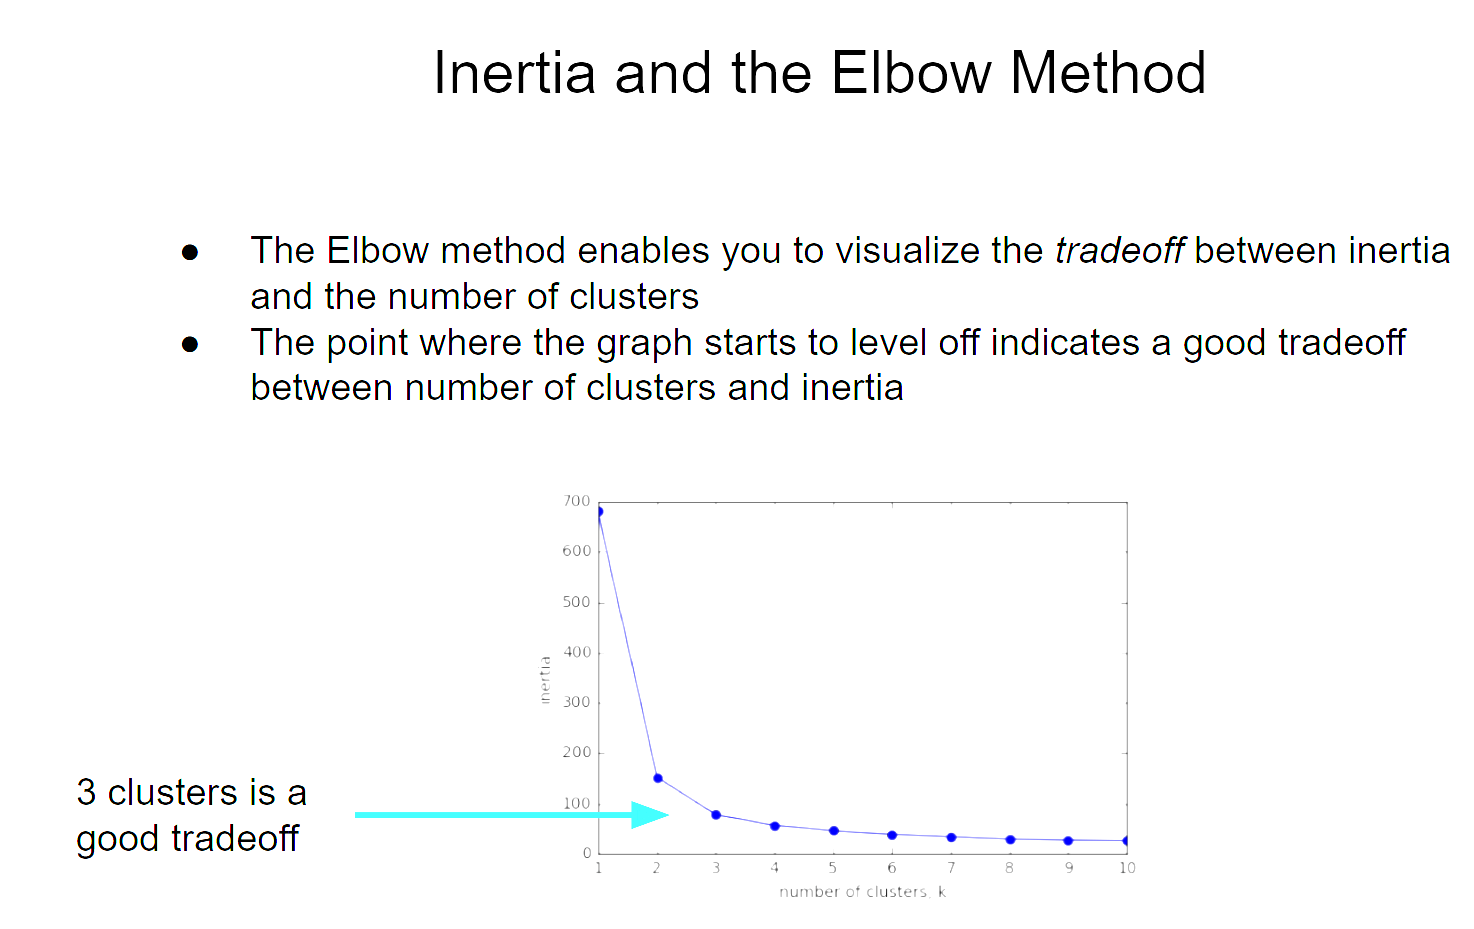

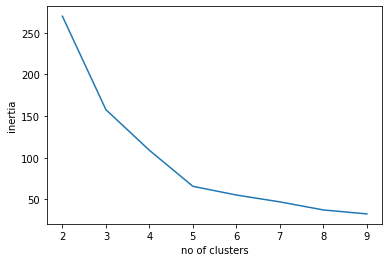

In [ ]:
# define a range of values of k to evaluate for inertia, fit and run the model, and plot the results

ks =range(2,10)
inertia =[]

for k in ks:
  model =KMeans(n_clusters=k)
  model.fit(scaled_x)
  inertia.append(model.inertia_)

 # plot no of cluster and inertia

plt.plot(ks,inertia)
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show() 

# Silhouette Score

* Silhouette score is a measure of how dense each cluster is and how well separated they are from each other.

* The metric is similar to inertia in its overall goal, but it is calculated and interpreted differently.

* Rather than basing the calculations on the centroid, the calculation is based on the distance between points 

* The silhouette score is computed on every datapoint in every cluster

* The range of Silhouette Scores is -1 to 1 with a high score being better

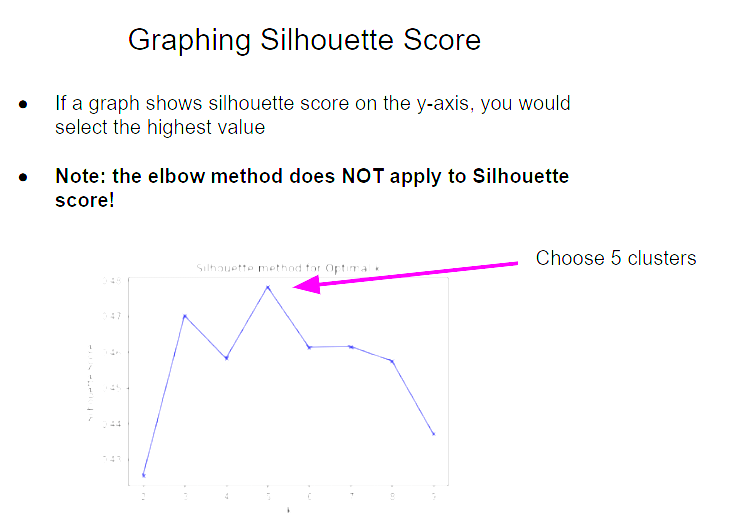

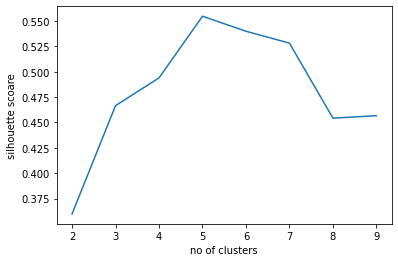

In [ ]:
# define a range of values of k to evaluate for silhouette score, fit and run the model, and plot the results
ks =range(2,10)
sil =[]

for k in ks:
  model =KMeans(n_clusters=k)
  model.fit(scaled_x)
  sil.append(silhouette_score(scaled_x,model.labels_))

 # plot no of cluster and inertia

plt.plot(ks,sil)
plt.xlabel('no of clusters')
plt.ylabel('silhouette scoare')
plt.show() 

# NOTE

Sometimes the Inertia Elbow Method and the Silhouette Score disagree!  There is no exact science for choosing clusters.

# Final Model and Clustering the Dataset

In [ ]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
km =KMeans(n_clusters=5,random_state=42)


In [ ]:
# add a column to the dataframe to add the cluster label as you fit and predict x 
df['cluster'] = km.fit_predict(scaled_x)

In [ ]:
# examine your dataframe with .head()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


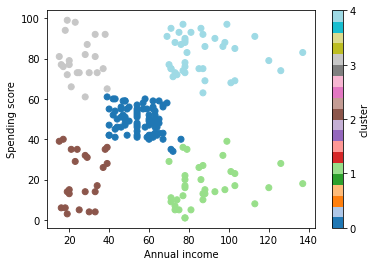

In [ ]:
# Make a scatterplot with these features and color code it based on the cluster.
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=df['cluster'],cmap='tab20')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
cb = plt.colorbar(ticks=[0,1,2,3,4])
cb.set_label('cluster')         

# Investigate each of the clusters. 

For example: What is the minimum and maximum income for each cluster? Hint: use grouby to group by cluster and investigate summary statistics for each cluster.

In [ ]:
# Use .groupby() to investigate the minimum, maximum, and mean value for each feature in each cluster.
df.groupby('cluster')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,81.0,55.296296,8.988109,39.0,48.00,54.0,62.00,76.0
1,35.0,88.200000,16.399067,70.0,77.50,85.0,97.50,137.0
2,23.0,26.304348,7.893811,15.0,19.50,25.0,33.00,39.0
3,22.0,25.727273,7.566731,15.0,19.25,24.5,32.25,39.0
4,39.0,86.538462,16.312485,69.0,75.50,79.0,95.00,137.0


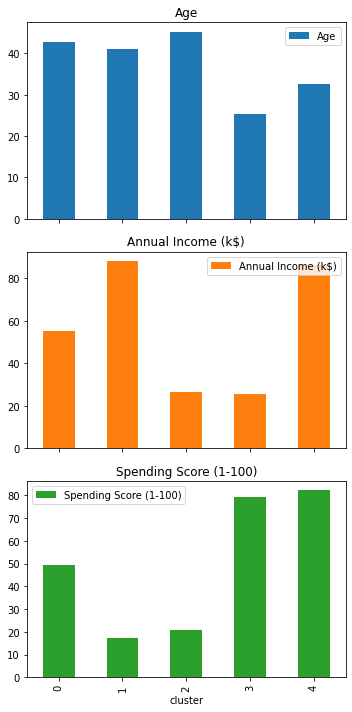

In [ ]:
df.groupby('cluster').mean().plot(subplots=True,kind='bar',figsize=(5,10))
plt.tight_layout()

Text(0.5, 0.92, 'Mall Customer Clusters')

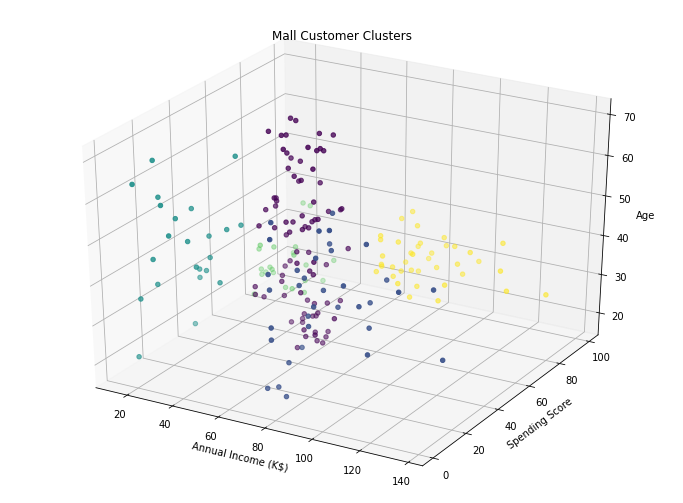

In [ ]:
# 3D plots
# Make a 3D scatterplot with these features and color code it based on the clusters
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 9)) # This establishes the size of the graph (try changing  the numbers to see the result)
ax = plt.axes(projection = "3d")

ax.scatter3D(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c = df['cluster'])
ax.set_xlabel("Annual Income (K$)")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Age")
plt.title("Mall Customer Clusters")


Task 2 Use Kmeans to establish clusters based on just the age and the spending score.
How many clusters in optimal?

In [ ]:
# Follow the steps outlined above to develop your model

In [ ]:
import plotly.express as px

px.scatter_3d(df, x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='cluster')

In [ ]:
# Make a scatterplot with these features and color code it based on the cluster

In [ ]:
# Investigate each of the clusters.  For example: What is the minimum and maximum age for each cluster?

Task 3 Use Kmeans to establish clusters based on three features: age, income, and spending score. How many clusters is optimal?

In [ ]:
# Challenge! Make a 3D scatterplot with these features and color code it based on the cluster.  Suggested link: https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

In [ ]:
# Investigate each of the clusters.